C:\Users\guddi\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.826e-01, tolerance: 3.259e-03
  model = cd_fast.enet_coordinate_descent(


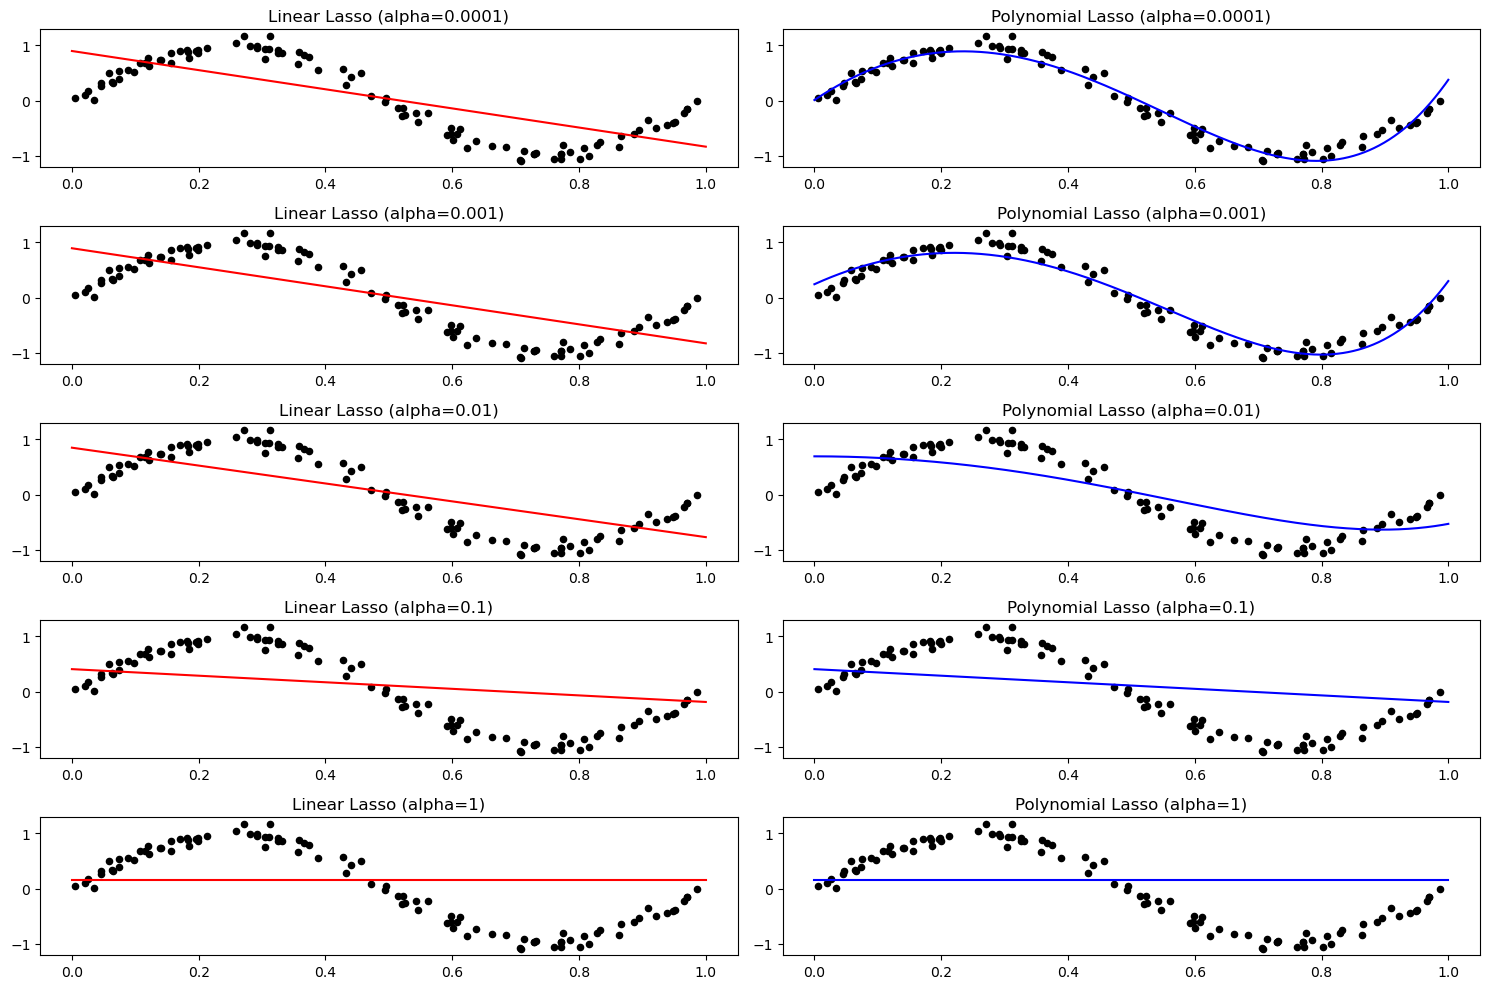

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate some sample data
np.random.seed(42)
X = np.sort(np.random.rand(100, 1), axis=0)
y = np.sin(2 * np.pi * X).ravel() + np.random.normal(0, 0.1, size=X.shape[0])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Different alpha values to try
alphas = [0.0001, 0.001, 0.01, 0.1, 1]

# For plotting
X_plot = np.linspace(0, 1, 1000).reshape(-1, 1)

# Compare Linear vs Polynomial for different alphas
plt.figure(figsize=(15, 10))

for i, alpha in enumerate(alphas):
    # Linear Lasso
    linear_lasso = Lasso(alpha=alpha)
    linear_lasso.fit(X_train, y_train)
    y_linear_pred = linear_lasso.predict(X_plot)
    
    # Polynomial Lasso (degree=5)
    poly_lasso = make_pipeline(
        PolynomialFeatures(degree=5),
        Lasso(alpha=alpha)
    )
    poly_lasso.fit(X_train, y_train)
    y_poly_pred = poly_lasso.predict(X_plot)
    
    # Plot results
    plt.subplot(len(alphas), 2, 2*i+1)
    plt.scatter(X, y, color='black', s=20)
    plt.plot(X_plot, y_linear_pred, color='red', label='Linear Lasso')
    plt.title(f'Linear Lasso (alpha={alpha})')
    
    plt.subplot(len(alphas), 2, 2*i+2)
    plt.scatter(X, y, color='black', s=20)
    plt.plot(X_plot, y_poly_pred, color='blue', label='Polynomial Lasso')
    plt.title(f'Polynomial Lasso (alpha={alpha})')

plt.tight_layout()
plt.show()

C:\Users\guddi\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.770e-02, tolerance: 2.955e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\guddi\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.913e-03, tolerance: 2.559e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\guddi\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.783e-02, toleranc

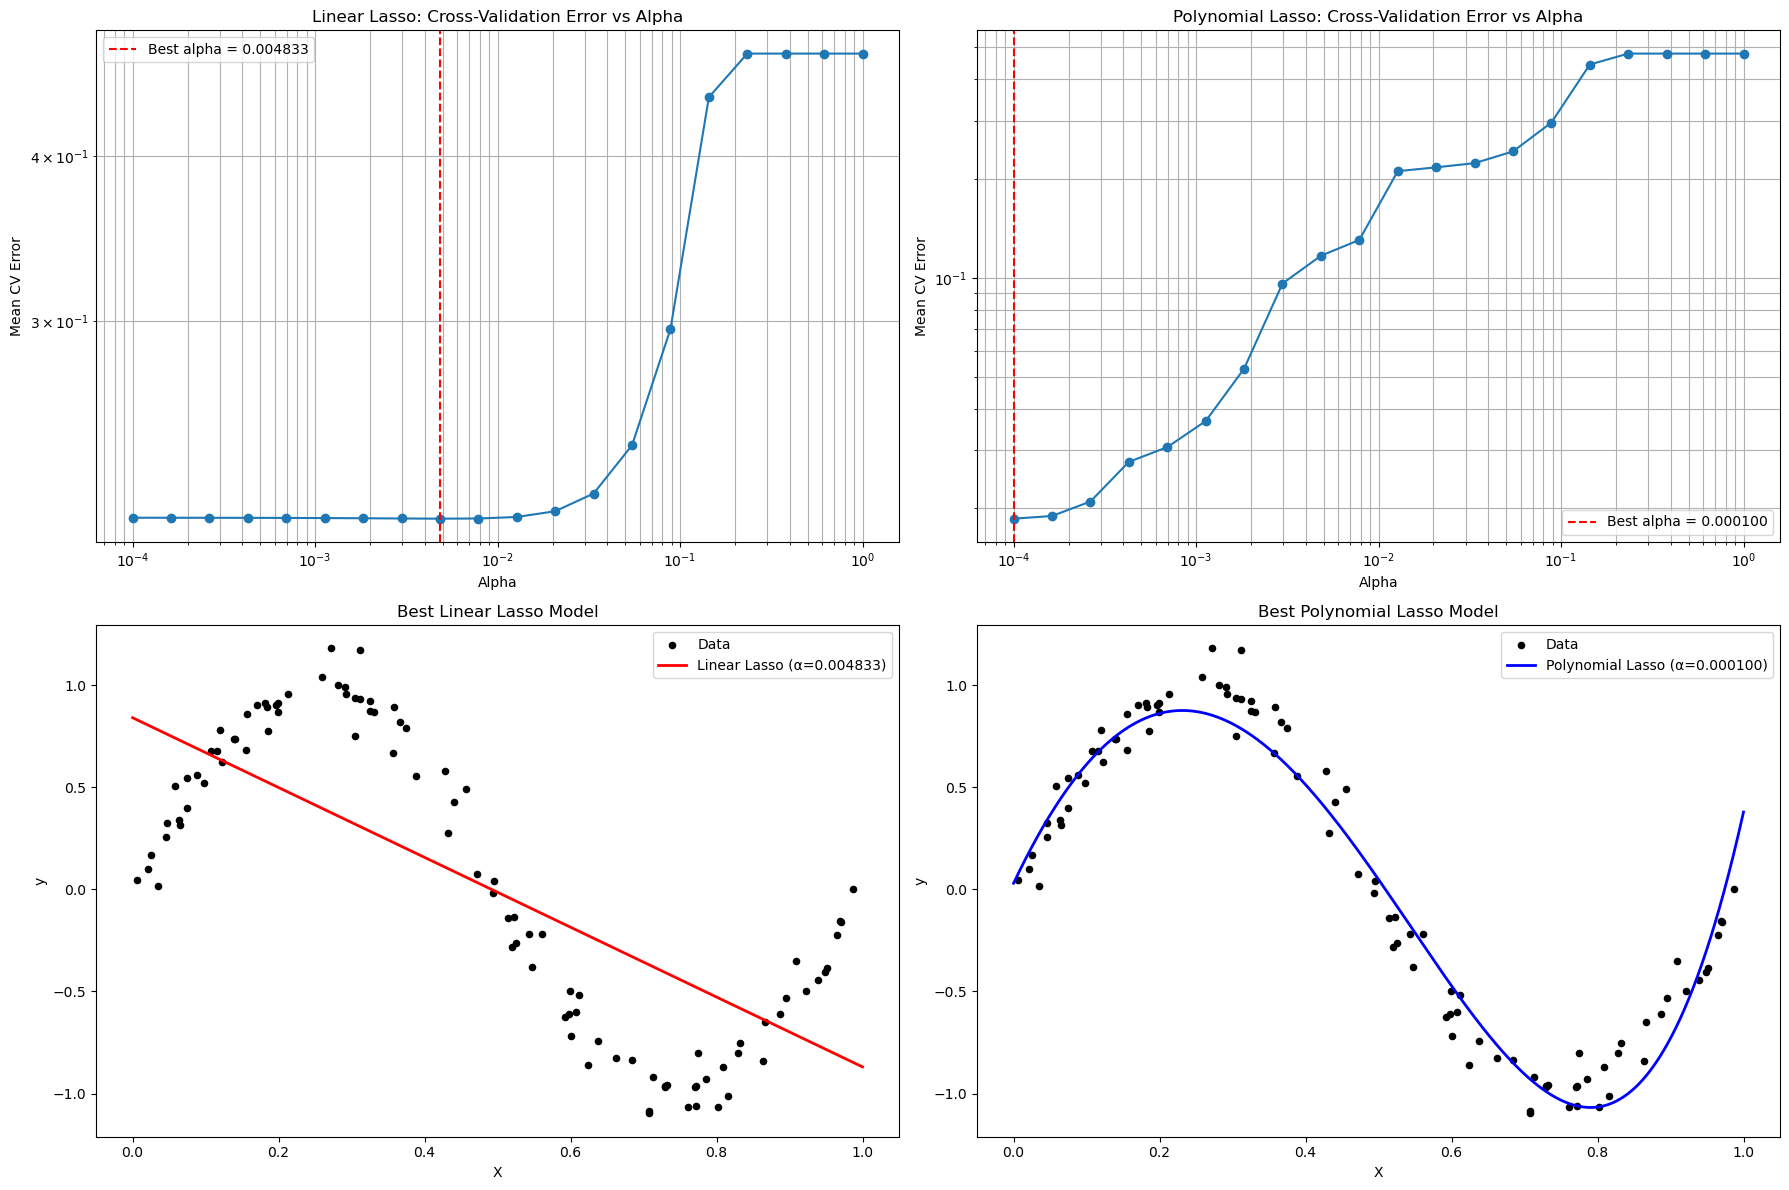

C:\Users\guddi\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.804e-01, tolerance: 3.300e-03
  model = cd_fast.enet_coordinate_descent(


<Figure size 1200x800 with 0 Axes>

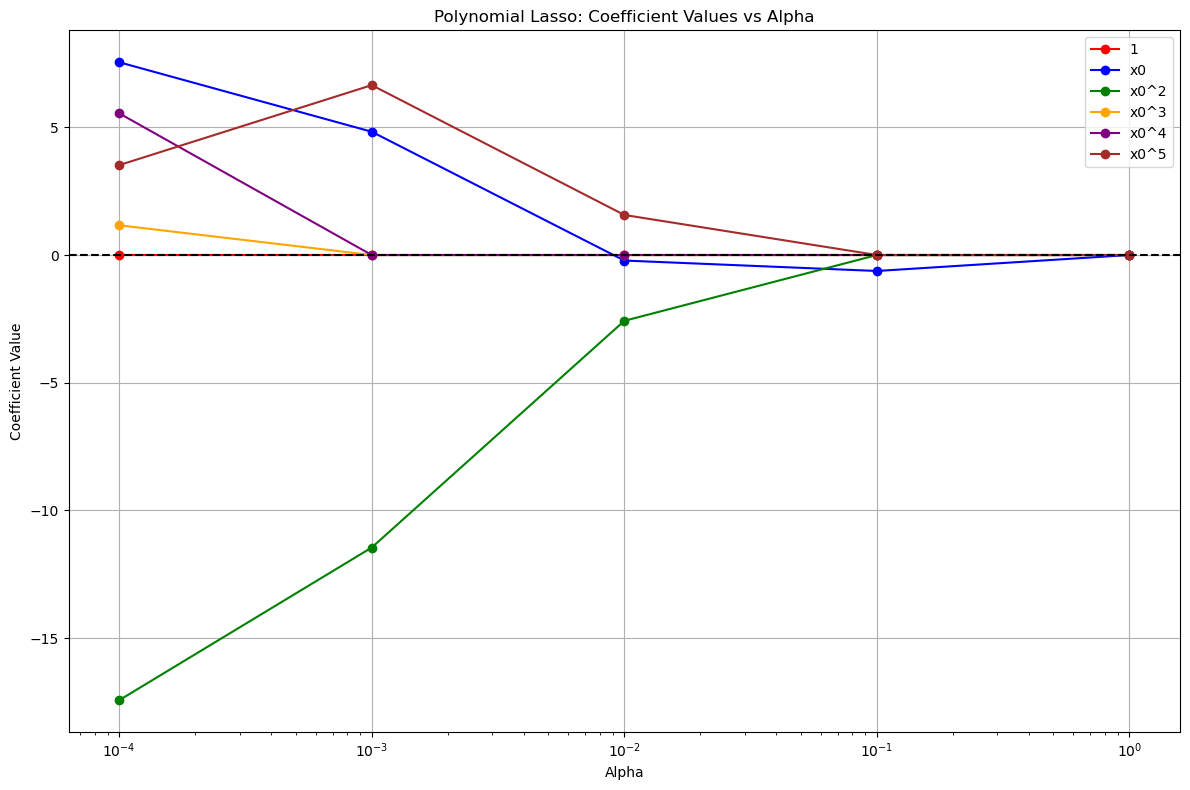

Best alpha for Linear Lasso (using LassoCV): 0.0018329807108324356
Best alpha for Polynomial Lasso (using LassoCV): 0.0001


C:\Users\guddi\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.026052428563526853, tolerance: 0.0027402651628886175
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\guddi\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.12416167570458558, tolerance: 0.0027402651628886175
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\guddi\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.15572614031739984, tolerance: 0.0027402651628886175
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\guddi\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

# Generate synthetic data for demonstration
np.random.seed(42)
X = np.sort(np.random.rand(100, 1), axis=0)
y = np.sin(2 * np.pi * X).ravel() + np.random.normal(0, 0.1, size=X.shape[0])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create alpha values to test
alphas = np.logspace(-4, 0, 20)  # 20 values from 0.0001 to 1

# Initialize figure
plt.figure(figsize=(18, 12))

# --------------- LINEAR LASSO CV ----------------
# Perform manual cross-validation to show the process
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Storage for cross-validation errors
cv_errors_linear = np.zeros((n_folds, len(alphas)))
cv_errors_poly = np.zeros((n_folds, len(alphas)))

# Perform CV for Linear Lasso
for i, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    X_cv_train, X_cv_val = X_train[train_idx], X_train[val_idx]
    y_cv_train, y_cv_val = y_train[train_idx], y_train[val_idx]
    
    for j, alpha in enumerate(alphas):
        # Linear Lasso
        linear_model = Lasso(alpha=alpha, max_iter=10000)
        linear_model.fit(X_cv_train, y_cv_train)
        y_pred = linear_model.predict(X_cv_val)
        cv_errors_linear[i, j] = mean_squared_error(y_cv_val, y_pred)
        
        # Polynomial Lasso
        poly_features = PolynomialFeatures(degree=5).fit_transform(X_cv_train)
        poly_val_features = PolynomialFeatures(degree=5).fit_transform(X_cv_val)
        poly_model = Lasso(alpha=alpha, max_iter=10000)
        poly_model.fit(poly_features, y_cv_train)
        y_poly_pred = poly_model.predict(poly_val_features)
        cv_errors_poly[i, j] = mean_squared_error(y_cv_val, y_poly_pred)

# Calculate mean CV error across folds
mean_cv_error_linear = np.mean(cv_errors_linear, axis=0)
mean_cv_error_poly = np.mean(cv_errors_poly, axis=0)

# Find best alpha
best_alpha_idx_linear = np.argmin(mean_cv_error_linear)
best_alpha_linear = alphas[best_alpha_idx_linear]
best_alpha_idx_poly = np.argmin(mean_cv_error_poly)
best_alpha_poly = alphas[best_alpha_idx_poly]

# Plot CV errors vs alpha
plt.subplot(2, 2, 1)
plt.loglog(alphas, mean_cv_error_linear, marker='o', linestyle='-')
plt.axvline(x=best_alpha_linear, color='r', linestyle='--', 
           label=f'Best alpha = {best_alpha_linear:.6f}')
plt.xlabel('Alpha')
plt.ylabel('Mean CV Error')
plt.title('Linear Lasso: Cross-Validation Error vs Alpha')
plt.grid(True, which="both", ls="-")
plt.legend()

plt.subplot(2, 2, 2)
plt.loglog(alphas, mean_cv_error_poly, marker='o', linestyle='-')
plt.axvline(x=best_alpha_poly, color='r', linestyle='--',
           label=f'Best alpha = {best_alpha_poly:.6f}')
plt.xlabel('Alpha')
plt.ylabel('Mean CV Error')
plt.title('Polynomial Lasso: Cross-Validation Error vs Alpha')
plt.grid(True, which="both", ls="-")
plt.legend()

# Train models with best alpha and visualize
X_plot = np.linspace(0, 1, 1000).reshape(-1, 1)

# Best Linear Lasso model
best_linear_lasso = Lasso(alpha=best_alpha_linear)
best_linear_lasso.fit(X_train, y_train)
y_linear_pred = best_linear_lasso.predict(X_plot)

# Best Polynomial Lasso model
poly_features_train = PolynomialFeatures(degree=5).fit_transform(X_train)
poly_features_plot = PolynomialFeatures(degree=5).fit_transform(X_plot)
best_poly_lasso = Lasso(alpha=best_alpha_poly)
best_poly_lasso.fit(poly_features_train, y_train)
y_poly_pred = best_poly_lasso.predict(poly_features_plot)

# Show the final models with best alpha
plt.subplot(2, 2, 3)
plt.scatter(X, y, color='black', s=20, label='Data')
plt.plot(X_plot, y_linear_pred, color='red', linewidth=2, 
         label=f'Linear Lasso (α={best_alpha_linear:.6f})')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Linear Lasso Model')
plt.legend()

plt.subplot(2, 2, 4)
plt.scatter(X, y, color='black', s=20, label='Data')
plt.plot(X_plot, y_poly_pred, color='blue', linewidth=2, 
         label=f'Polynomial Lasso (α={best_alpha_poly:.6f})')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Polynomial Lasso Model')
plt.legend()

plt.tight_layout()
plt.show()

# Compare coefficient values for different alphas in polynomial model
plt.figure(figsize=(12, 8))

# Get original polynomial feature names
poly = PolynomialFeatures(degree=5)
poly.fit_transform(X[:1])
feature_names = poly.get_feature_names_out()

coefs = []
for alpha in [0.0001, 0.001, 0.01, 0.1, 1.0]:
    model = Lasso(alpha=alpha)
    model.fit(poly.fit_transform(X_train), y_train)
    coefs.append(model.coef_)

coefs = np.array(coefs)

# Plot coefficient values vs alpha
plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
alphas_plot = [0.0001, 0.001, 0.01, 0.1, 1.0]

for i in range(len(feature_names)):
    plt.plot(alphas_plot, coefs[:, i], '-o', color=colors[i % len(colors)], 
             label=feature_names[i])

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Polynomial Lasso: Coefficient Values vs Alpha')
plt.axhline(y=0, color='k', linestyle='--')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

# Finally, use LassoCV directly to verify our results
lasso_cv = LassoCV(cv=5, random_state=0, alphas=alphas)
lasso_cv.fit(X_train, y_train)
print(f"Best alpha for Linear Lasso (using LassoCV): {lasso_cv.alpha_}")

poly_lasso_cv = make_pipeline(
    PolynomialFeatures(degree=5),
    LassoCV(cv=5, random_state=0, alphas=alphas)
)
poly_lasso_cv.fit(X_train, y_train)
best_alpha_poly_cv = poly_lasso_cv.named_steps['lassocv'].alpha_
print(f"Best alpha for Polynomial Lasso (using LassoCV): {best_alpha_poly_cv}")